In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive (18).zip to archive (18).zip


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
learning_rate = 0.0001

In [ ]:
import os
import shutil

data_path = 'extracted_files'
cat_dir = os.path.join(data_path, 'cats')
dog_dir = os.path.join(data_path, 'dogs')


os.makedirs(cat_dir, exist_ok=True)
os.makedirs(dog_dir, exist_ok=True)


for file in os.listdir(data_path):
    # Check if it's a file and not a directory
    if os.path.isfile(os.path.join(data_path, file)):
        if 'cat' in file.lower():
            shutil.move(os.path.join(data_path, file), os.path.join(cat_dir, file))
        elif 'dog' in file.lower():
            shutil.move(os.path.join(data_path, file), os.path.join(dog_dir, file))

print(" Sorted as cats , dogs")

 Sorted as cats , dogs


In [ ]:
import zipfile
import os


zip_file_name = 'archive (18).zip'


with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('extracted_files')


print(os.listdir('extracted_files'))

['cats', 'dogs', 'PetImages']


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [ ]:
img_size = (150, 150)
batch_size = 32

data_dir = 'extracted_files/PetImages'

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
143/625 ━━━━━━━━━━━━━━━━━━━━ 14:57 2s/step - accuracy: 0.5213 - loss: 0.6946

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 ━━━━━━━━━━━━━━━━━━━━ 1331s 2s/step - accuracy: 0.5592 - loss: 0.6785 - val_accuracy: 0.6725 - val_loss: 0.6066
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1299s 2s/step - accuracy: 0.6812 - loss: 0.5948 - val_accuracy: 0.6985 - val_loss: 0.5739
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1325s 2s/step - accuracy: 0.6993 - loss: 0.5638 - val_accuracy: 0.7453 - val_loss: 0.5183
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1290s 2s/step - accuracy: 0.7330 - loss: 0.5271 - val_accuracy: 0.7131 - val_loss: 0.5374
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1293s 2s/step - accuracy: 0.7492 - loss: 0.5125 - val_accuracy: 0.7691 - val_loss: 0.4801
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1289s 2s/step - accuracy: 0.7596 - loss: 0.4895 - val_accuracy: 0.7595 - val_loss: 0.4814
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1286s 2s/step - accuracy: 0.7721 - loss: 0.4725 - val_accuracy: 0.7713 - val_loss: 0.4688
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1388s 2s/step - accuracy: 0.7823 - loss: 0.4580 - val_accurac

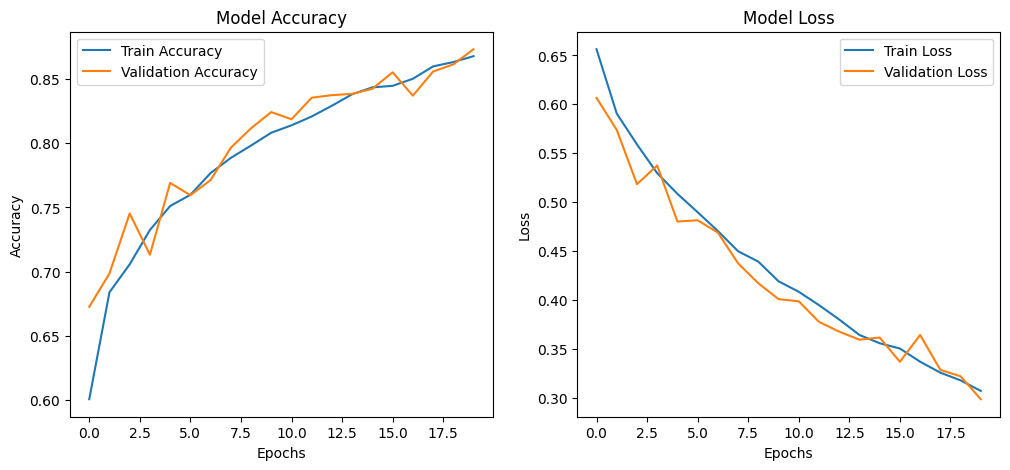

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


In [ ]:
model.save('Cat , Dog.h5')

In [ ]:
import numpy as np
while True :

 uploaded = files.upload()


 image_path = list(uploaded.keys())[0]

 img_size = (150, 150)

 img = image.load_img(image_path, target_size=img_size)
 img_array = image.img_to_array(img)
 img_array = np.expand_dims(img_array, axis=0)
 img_array /= 255.0


 prediction = model.predict(img_array)


 if prediction[0] > 0.5:
    predicted_class = "Dog"
 else:
    predicted_class = "Cat"

 plt.imshow(img)
 plt.axis("off")
 plt.title(predicted_class)
 plt.show()


NameError: name 'files' is not defined